In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import rcParams
rcParams["font.size"] = 16
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans"]
rcParams["text.usetex"] = True
rcParams["text.latex.preamble"] = r"\usepackage{cmbright}"
rcParams["savefig.dpi"] = 100

# A note about sigmas

We are regularly asked about the "sigma" levels in the 2D histograms. These are not the 68%, *etc.* values that we're used to for 1D distributions. In two dimensions, a Gaussian density is given by:

    pdf(r) = exp(-(r/s)^2/2) / (2*pi*s^2)

The integral under this density (using polar coordinates and implicitly integrating out the angle) is:

    cdf(x) = Integral(r * exp(-(r/s)^2/2) / s^2, {r, 0, x})
           = 1 - exp(-(x/s)^2/2)

This means that within "1-sigma", the Gaussian contains `1-exp(-0.5) ~ 0.393` or 39.3% of the volume. Therefore the relevant 1-sigma levels for a 2D histogram of samples is 39% not 68%. If you must use 68% of the mass, use the `levels` keyword argument when you call `corner.corner`.

We can visualize the difference between sigma definitions:

In [9]:
import corner
import numpy as np
import matplotlib.pyplot as pl

# Generate some fake data from a Gaussian
np.random.seed(42)
x = np.random.randn(50000, 2)

First, plot this using the correct (default) 1-sigma level:

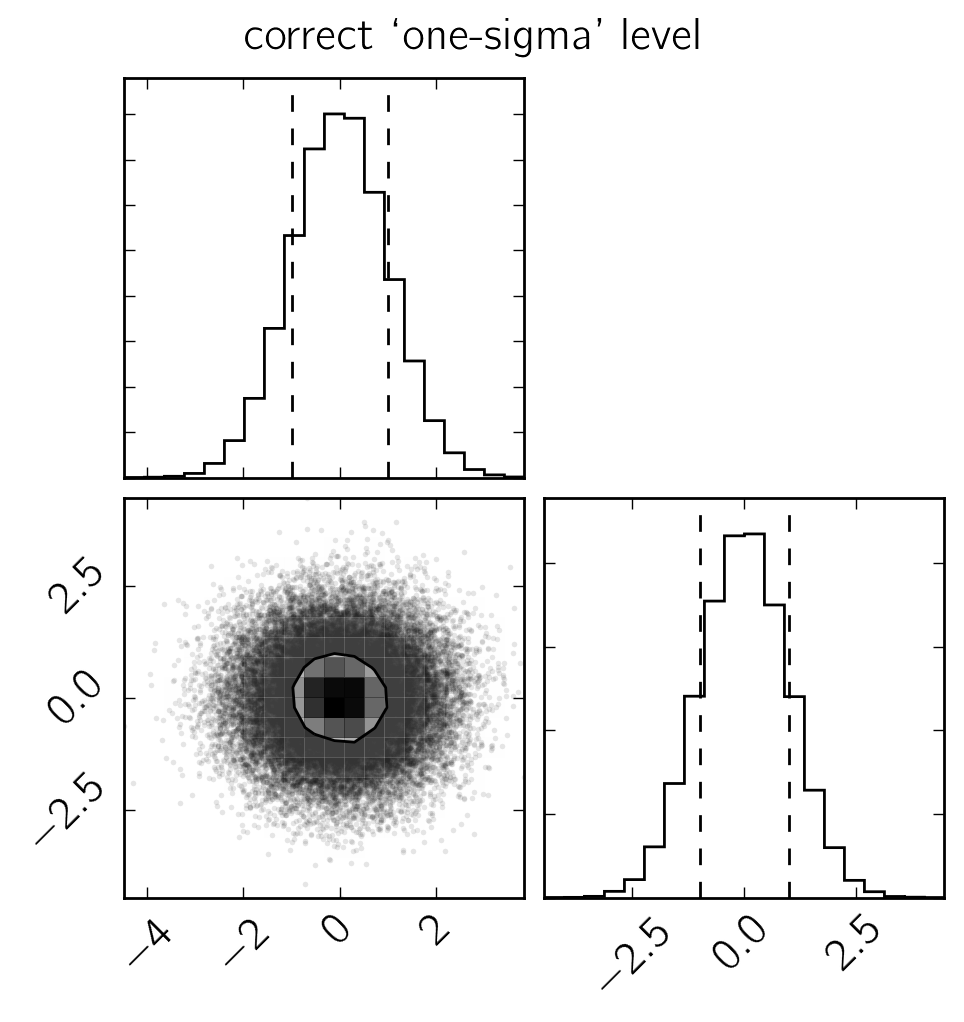

In [14]:
fig = corner.corner(x, quantiles=(0.16, 0.84), levels=(1-np.exp(-0.5),))
fig.suptitle("correct `one-sigma' level");

Compare this to the 68% mass level and specifically compare to how the contour compares to the marginalized 68% quantile:

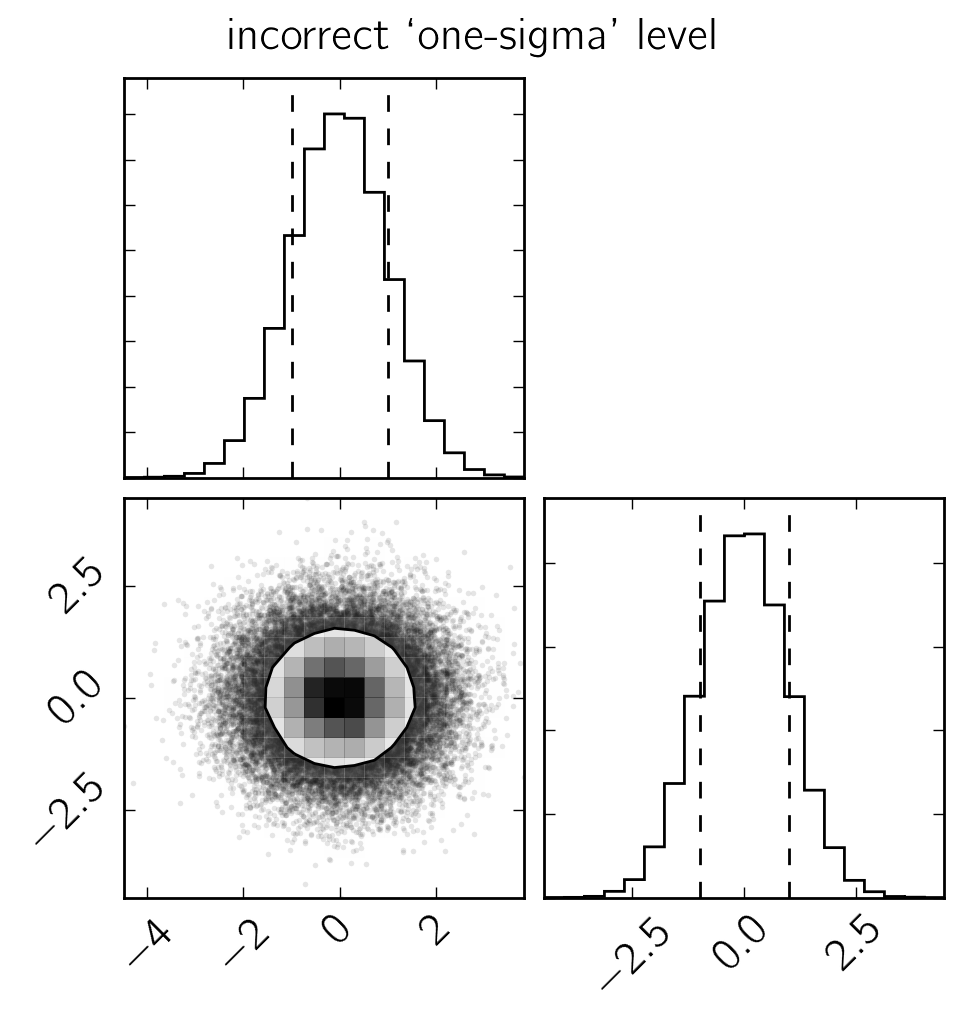

In [13]:
fig = corner.corner(x, quantiles=(0.16, 0.84), levels=(0.68,))
fig.suptitle("incorrect `one-sigma' level");